## Install Dependencies

In [ ]:
!pip install -U "transformers==4.40.0" --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 22.3 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.4
    Uninstalling transformers-4.42.4:
      Successfully uninstalled transformers-4.42.4


In [ ]:
!pip install -i https://pypi.org/simple/ bitsandbytes

Looking in indexes: https://pypi.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 8.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Usin

In [ ]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 5.5 MB/s eta 0:00:00


## Download Llama 3

In [ ]:
import transformers
import torch

model_id = "unsloth/llama-3-8b-Instruct-bnb-4bit"

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={
        "torch_dtype": torch.float16,
        "quantization_config": {"load_in_4bit": True},
        "low_cpu_mem_usage": True,
    },
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
/usr/local/lib/python3.10/dist-packages/transformers/quantizers/auto.py:159: UserWarning: You passed `quantization_config` or equivalent parameters to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantization_config` from the model will be used.
  warnings.warn(warning_msg)


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/131 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.1k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


## Query Llama 3

In [ ]:
messages = [
    {"role"   : "system",
     "content": "You are a helpful assistant!"},
    {"role"   : "user",
     "content": """What is the meaning of life?"""},
]

prompt = pipeline.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
)

terminators = [
    pipeline.tokenizer.eos_token_id,
    pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

outputs = pipeline(
    prompt,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.9,
)

print(outputs[0]["generated_text"][len(prompt):])

What a profound and age-old question! The meaning of life is a topic that has been debated and explored by philosophers, scientists, spiritual leaders, and many others throughout history.

While there is no one definitive answer, here are some perspectives that might shed some light:

1. **Purpose and fulfillment**: For some, the meaning of life is to find purpose and fulfillment in their own existence. This can come from pursuing their passions, building meaningful relationships, or contributing to something greater than themselves.
2. **Existentialism**: According to existentialist philosophers like Jean-Paul Sartre and Martin Heidegger, the meaning of life is not predetermined or given by others. Instead, individuals must create their own meaning through their choices, actions, and experiences.
3. **Spiritual or religious beliefs**: Many people find meaning in their lives through their spiritual or religious beliefs. For example, some may believe that their purpose is to serve a hig

In [ ]:
messages = [
    {"role"   : "system",
     "content": "You are a helpful assistant!"},
    {"role"   : "user",
     "content": """How can I learn Software Architecture?"""},
]

prompt = pipeline.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
)

terminators = [
    pipeline.tokenizer.eos_token_id,
    pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

outputs = pipeline(
    prompt,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.9,
)

print(outputs[0]["generated_text"][len(prompt):])

Learning software architecture is a valuable skill that can benefit your career and help you design and develop more robust and scalable software systems. Here are some steps and resources to help you get started:

1. **Understand the basics**: Start by learning the fundamentals of software architecture, including:
	* Definition and scope of software architecture
	* Types of software architecture (e.g., monolithic, microservices, service-oriented)
	* Architecture styles (e.g., layered, event-driven, microkernel)
2. **Study the principles**: Familiarize yourself with the principles of software architecture, such as:
	* Separation of concerns
	* Abstraction
	* Modularity
	* Scalability
	* Maintainability
	* Flexibility
3. **Learn from real-world examples**: Study real-world examples of software architectures, such as:
	* Microservices-based systems (e.g., Netflix, Amazon)
	* Service-oriented architectures (e.g., eBay, PayPal)
	* Cloud-native architectures (e.g., Google Cloud, Microsoft A

## Build a Chat App

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.8/857.8 kB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.

In [ ]:
import gradio as gr

messages = []

def add_text(history, text):
    global messages  #message[list] is defined globally
    history = history + [(text,'')]
    messages = messages + [{"role":'user', 'content': text}]
    return history, ''

def generate(history):
  global messages
  prompt = pipeline.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
)

  terminators = [
    pipeline.tokenizer.eos_token_id,
    pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

  outputs = pipeline(
    prompt,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.9,
)
  response_msg = outputs[0]["generated_text"][len(prompt):]
  for char in response_msg:
      history[-1][1] += char
      yield history
  pass

with gr.Blocks() as demo:

    chatbot = gr.Chatbot(value=[], elem_id="chatbot")
    with gr.Row():
            txt = gr.Textbox(
                show_label=False,
                placeholder="Enter text and press enter",
            )

    txt.submit(add_text, [chatbot, txt], [chatbot, txt], queue=False).then(
            generate, inputs =[chatbot,],outputs = chatbot,)

demo.queue()
demo.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://572e261e69f7205e64.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://572e261e69f7205e64.gradio.live


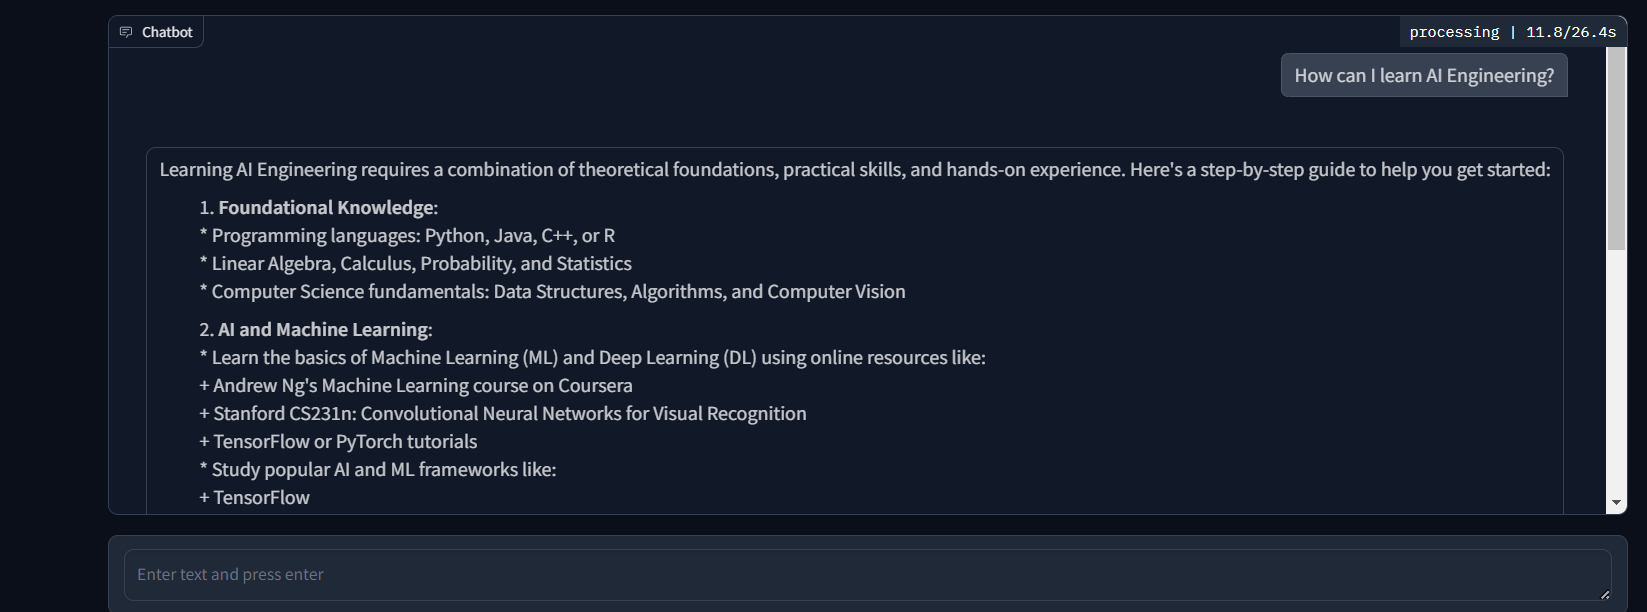

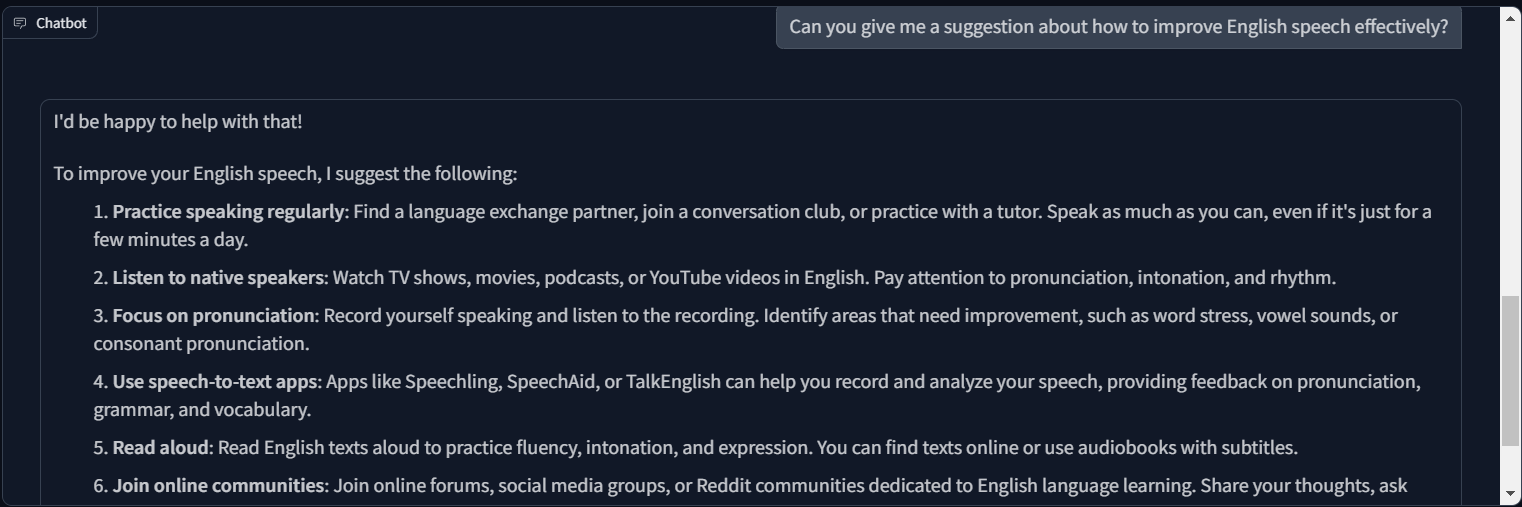

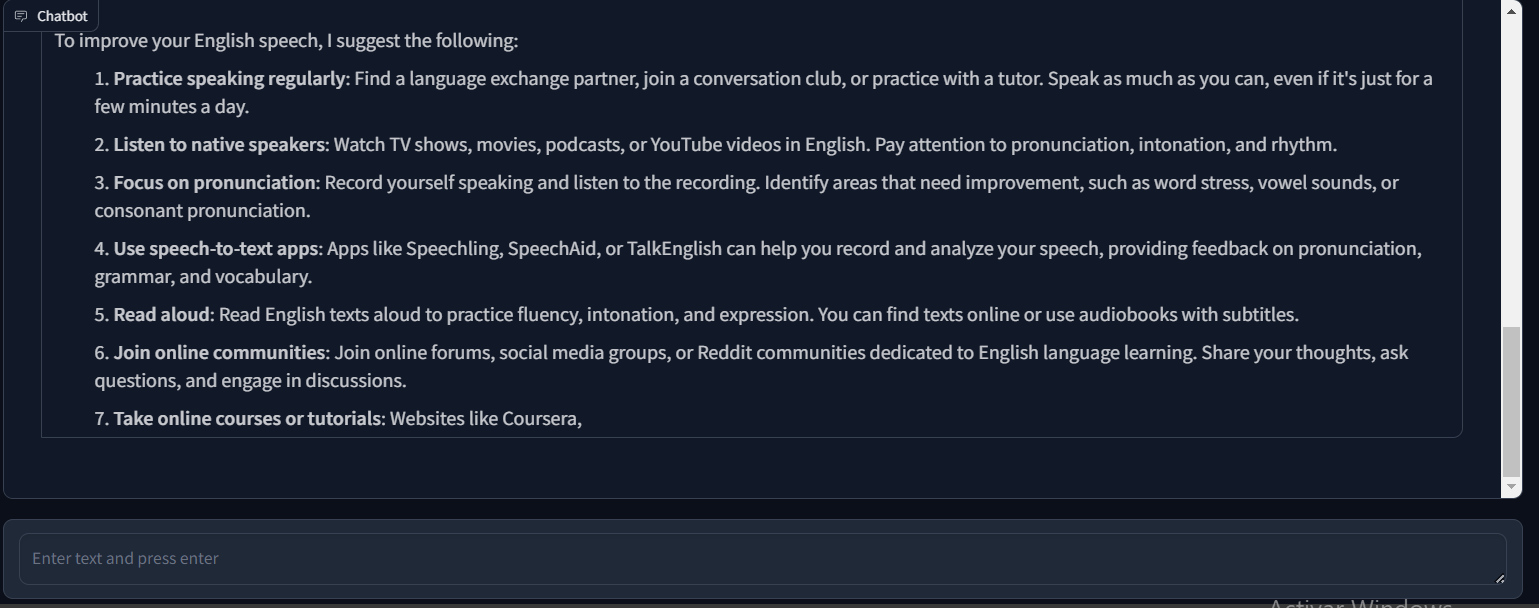